# Trích xuất đặc trưng cho BigDS

In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [44]:
df = pd.read_csv('raw_data_10k.csv')
df['Recommended'] = df['Recommended'].replace({'yes': 1, 'no': 0})
df_raw = df.copy()
df = df.drop(df.columns[0], axis=1)
df.head(6)

,Aircraft,Airline Name,Cabin Staff Service,Date Flown,Food & Beverages,Ground Service,Inflight Entertainment,Recommended,Route,Seat Comfort,Seat Type,Type Of Traveller,Value For Money,Wifi & Connectivity
0,NaN,adria-airways,1,September 2019,1.0,1,1.0,0,Sofia to Amsterdam via Ljubljana,1,Economy Class,Couple Leisure,1,1.0
1,CR 900,adria-airways,1,September 2019,1.0,1,1.0,0,Sarajevo to Ljubljana,1,Economy Class,Couple Leisure,1,1.0
2,Bombardier CRJ,adria-airways,1,August 2019,1.0,1,1.0,0,Timisoara to Munich,1,Economy Class,Solo Leisure,1,1.0
3,NaN,adria-airways,2,August 2019,1.0,1,1.0,0,Pristina to Zürich via Ljubliana,1,Economy Class,Solo Leisure,1,1.0
4,NaN,adria-airways,1,March 2018,1.0,1,1.0,0,Ljubljana to Frankfurt,2,Economy Class,Solo Leisure,1,1.0
5,CR9,adria-airways,5,April 2017,4.0,5,4.0,1,Ljubljana to Zurich,5,Economy Class,Business,4,NaN


In [45]:
df.drop(['Aircraft','Airline Name','Date Flown','Route'], axis=1, inplace=True)
df.to_csv("clean_data_10k.csv")
df.head()

,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Recommended,Seat Comfort,Seat Type,Type Of Traveller,Value For Money,Wifi & Connectivity
0,1,1.0,1,1.0,0,1,Economy Class,Couple Leisure,1,1.0
1,1,1.0,1,1.0,0,1,Economy Class,Couple Leisure,1,1.0
2,1,1.0,1,1.0,0,1,Economy Class,Solo Leisure,1,1.0
3,2,1.0,1,1.0,0,1,Economy Class,Solo Leisure,1,1.0
4,1,1.0,1,1.0,0,2,Economy Class,Solo Leisure,1,1.0


In [46]:
df.describe()

,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Recommended,Seat Comfort,Value For Money,Wifi & Connectivity
count,10733.000000,10684.000000,10733.000000,10578.000000,10733.000000,10733.000000,10733.000000,6991.000000
mean,2.882139,2.448615,2.519799,2.400454,0.355632,2.619398,2.505264,1.857531
std,1.588720,1.493622,1.566368,1.457140,0.478727,1.458017,1.559569,1.335983
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
50%,3.000000,2.000000,2.000000,2.000000,0.000000,3.000000,2.000000,1.000000
75%,4.000000,4.000000,4.000000,4.000000,1.000000,4.000000,4.000000,3.000000
max,5.000000,5.000000,5.000000,5.000000,1.000000,5.000000,5.000000,5.000000


# Missing value

In [47]:
def draw_missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data
draw_missing_data_table(df)

,Total,Percent
Wifi & Connectivity,3742,0.348644
Inflight Entertainment,155,0.014441
Food & Beverages,49,0.004565
Cabin Staff Service,0,0.000000
Ground Service,0,0.000000
Recommended,0,0.000000
Seat Comfort,0,0.000000
Seat Type,0,0.000000
Type Of Traveller,0,0.000000
Value For Money,0,0.000000


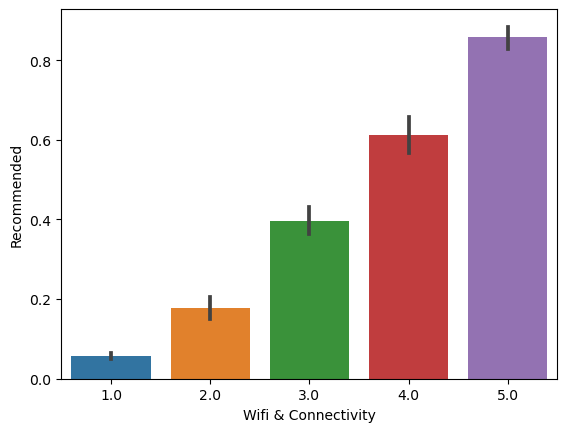

In [48]:
sns.barplot(x=df['Wifi & Connectivity'], y=df['Recommended']);

In [49]:
df['Wifi & Connectivity_NAN']=np.where(df['Wifi & Connectivity'].isnull(),1,0)

df['Inflight Entertainment'].fillna(df['Inflight Entertainment'].median(),inplace=True)

df['Food & Beverages'].fillna(df['Food & Beverages'].median(),inplace=True)
draw_missing_data_table(df)

,Total,Percent
Wifi & Connectivity,3742,0.348644
Cabin Staff Service,0,0.000000
Food & Beverages,0,0.000000
Ground Service,0,0.000000
Inflight Entertainment,0,0.000000
Recommended,0,0.000000
Seat Comfort,0,0.000000
Seat Type,0,0.000000
Type Of Traveller,0,0.000000
Value For Money,0,0.000000


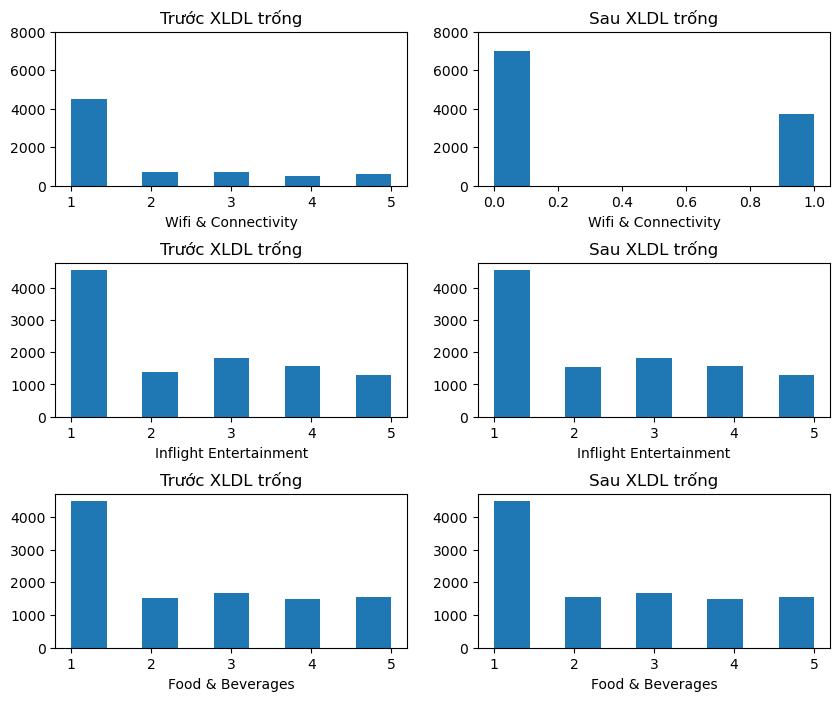

In [50]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 8))

axs[0][0].hist(df_raw['Wifi & Connectivity'], bins=9)
axs[0][1].hist(df['Wifi & Connectivity_NAN'], bins=9)
axs[0][0].set_xlabel('Wifi & Connectivity')
axs[0][1].set_xlabel('Wifi & Connectivity')
axs[0][0].set_title('Trước XLDL trống')
axs[0][1].set_title('Sau XLDL trống')
axs[0][0].set_ylim(0, 8000)
axs[0][1].set_ylim(0, 8000)

axs[1][0].hist(df_raw['Inflight Entertainment'], bins=9)
axs[1][1].hist(df['Inflight Entertainment'], bins=9)
axs[1][0].set_xlabel('Inflight Entertainment')
axs[1][1].set_xlabel('Inflight Entertainment')
axs[1][0].set_title('Trước XLDL trống')
axs[1][1].set_title('Sau XLDL trống')

axs[2][0].hist(df_raw['Food & Beverages'], bins=9)
axs[2][1].hist(df['Food & Beverages'], bins=9)
axs[2][0].set_xlabel('Food & Beverages')
axs[2][1].set_xlabel('Food & Beverages')
axs[2][0].set_title('Trước XLDL trống')
axs[2][1].set_title('Sau XLDL trống')

plt.subplots_adjust(hspace=0.5)
plt.show()

# Feature Extraction
Trích xuất đặc trưng (feature extraction) đề cập đến quá trình chuyển đổi dữ liệu thô (raw data) thành các đặc trưng số (numerical feature)

In [51]:
df.head()

,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Recommended,Seat Comfort,Seat Type,Type Of Traveller,Value For Money,Wifi & Connectivity,Wifi & Connectivity_NAN
0,1,1.0,1,1.0,0,1,Economy Class,Couple Leisure,1,1.0,0
1,1,1.0,1,1.0,0,1,Economy Class,Couple Leisure,1,1.0,0
2,1,1.0,1,1.0,0,1,Economy Class,Solo Leisure,1,1.0,0
3,2,1.0,1,1.0,0,1,Economy Class,Solo Leisure,1,1.0,0
4,1,1.0,1,1.0,0,2,Economy Class,Solo Leisure,1,1.0,0


In [52]:
encoded_df = pd.get_dummies(df, columns=['Seat Type', 'Type Of Traveller'])

In [53]:
encoded_df.drop('Wifi & Connectivity', axis=1, inplace=True)

In [54]:
encoded_df.head()

,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Recommended,Seat Comfort,Value For Money,Wifi & Connectivity_NAN,Seat Type_Business Class,Seat Type_Economy Class,Seat Type_First Class,Seat Type_Premium Economy,Type Of Traveller_Business,Type Of Traveller_Couple Leisure,Type Of Traveller_Family Leisure,Type Of Traveller_Solo Leisure
0,1,1.0,1,1.0,0,1,1,0,0,1,0,0,0,1,0,0
1,1,1.0,1,1.0,0,1,1,0,0,1,0,0,0,1,0,0
2,1,1.0,1,1.0,0,1,1,0,0,1,0,0,0,0,0,1
3,2,1.0,1,1.0,0,1,1,0,0,1,0,0,0,0,0,1
4,1,1.0,1,1.0,0,2,1,0,0,1,0,0,0,0,0,1


In [55]:
encoded_df['Food & Beverages'] = encoded_df['Food & Beverages'].astype(int)
encoded_df['Inflight Entertainment'] = encoded_df['Inflight Entertainment'].astype(int)
encoded_df['Seat Type_Business Class'] = encoded_df['Seat Type_Business Class'].astype(int)
encoded_df['Seat Type_Economy Class'] = encoded_df['Seat Type_Economy Class'].astype(int)
encoded_df['Seat Type_First Class'] = encoded_df['Seat Type_First Class'].astype(int)
encoded_df['Seat Type_Premium Economy'] = encoded_df['Seat Type_Premium Economy'].astype(int)
encoded_df['Type Of Traveller_Business'] = encoded_df['Type Of Traveller_Business'].astype(int)
encoded_df['Type Of Traveller_Couple Leisure'] = encoded_df['Type Of Traveller_Couple Leisure'].astype(int)
encoded_df['Type Of Traveller_Family Leisure'] = encoded_df['Type Of Traveller_Family Leisure'].astype(int)
encoded_df['Type Of Traveller_Solo Leisure'] = encoded_df['Type Of Traveller_Solo Leisure'].astype(int)
encoded_df.dtypes

Cabin Staff Service                 int64
Food & Beverages                    int32
Ground Service                      int64
Inflight Entertainment              int32
Recommended                         int64
Seat Comfort                        int64
Value For Money                     int64
Wifi & Connectivity_NAN             int32
Seat Type_Business Class            int32
Seat Type_Economy Class             int32
Seat Type_First Class               int32
Seat Type_Premium Economy           int32
Type Of Traveller_Business          int32
Type Of Traveller_Couple Leisure    int32
Type Of Traveller_Family Leisure    int32
Type Of Traveller_Solo Leisure      int32
dtype: object

# Feature Transformation
Biến đổi đặc trưng: Chuyển đổi các giá trị rating về khoảng từ 0 đến 1.

In [56]:
from sklearn.preprocessing import MinMaxScaler

rating_df = encoded_df.drop('Recommended', axis=1)
scaler = MinMaxScaler()
rating_df = scaler.fit_transform(rating_df)
rating_df = pd.DataFrame(rating_df, columns=['Cabin Staff Service', 'Food & Beverages', 'Ground Service', 'Inflight Entertainment',
                'Seat Comfort', 'Value For Money', 'Wifi & Connectivity_NAN', 'Seat Type_Business Class', 'Seat Type_Economy Class', 
                'Seat Type_First Class', 'Seat Type_Premium Economy','Type Of Traveller_Business', 'Type Of Traveller_Couple Leisure',
                'Type Of Traveller_Family Leisure', 'Type Of Traveller_Solo Leisure'])
rating_df['Recommended'] = encoded_df['Recommended']

In [57]:
rating_df.head()

,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Seat Comfort,Value For Money,Wifi & Connectivity_NAN,Seat Type_Business Class,Seat Type_Economy Class,Seat Type_First Class,Seat Type_Premium Economy,Type Of Traveller_Business,Type Of Traveller_Couple Leisure,Type Of Traveller_Family Leisure,Type Of Traveller_Solo Leisure,Recommended
0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,0.25,0.0,0.0,0.0,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,0.00,0.0,0.0,0.0,0.25,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0


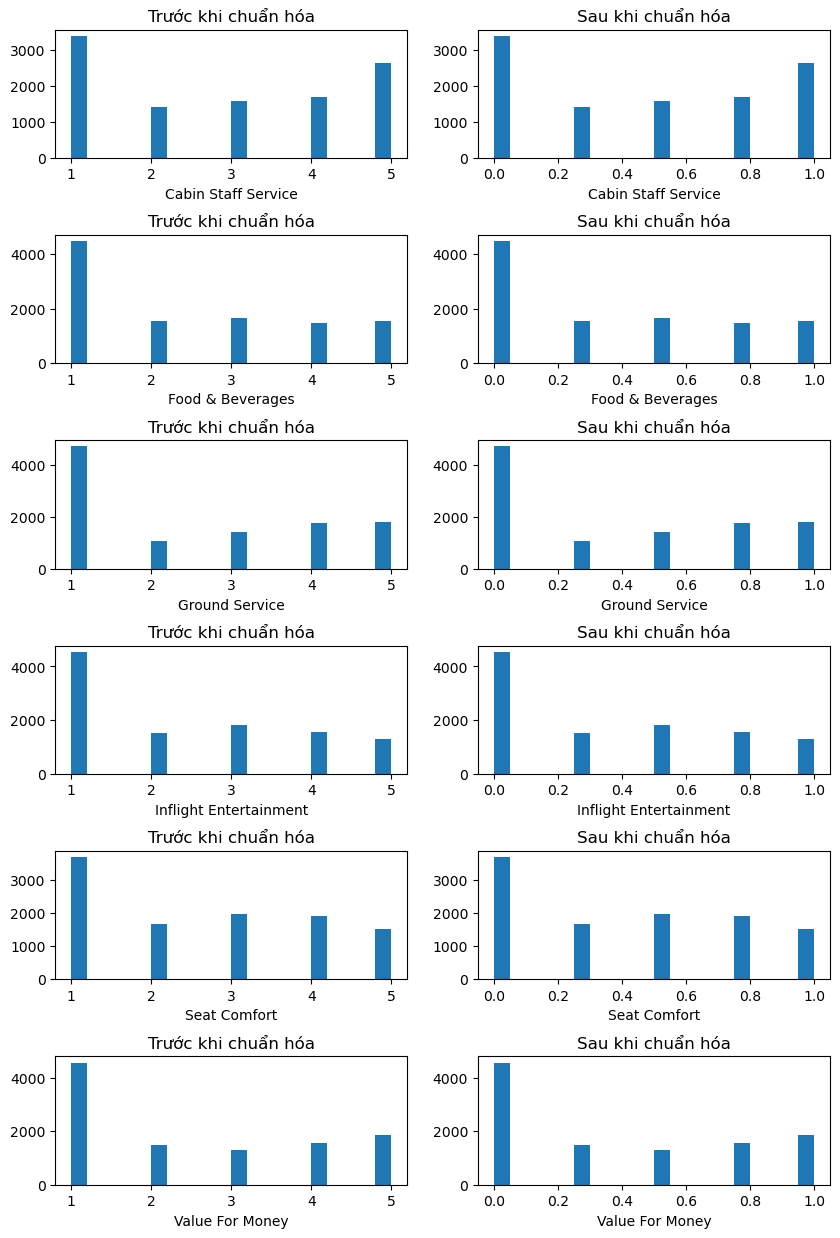

In [58]:
fig, axs = plt.subplots(6, 2, figsize=(10, 15))

texts = ['Cabin Staff Service','Food & Beverages','Ground Service','Inflight Entertainment','Seat Comfort',
         'Value For Money']
i = 0
for text in texts:
    axs[i][0].hist(encoded_df[text],bins=20)
    axs[i][0].set_xlabel(text)
    axs[i][0].set_title('Trước khi chuẩn hóa')
    axs[i][1].hist(rating_df[text],bins=20)
    axs[i][1].set_xlabel(text)
    axs[i][1].set_title('Sau khi chuẩn hóa')
    i += 1
    
plt.subplots_adjust(hspace=0.6)
plt.show()

# Feature Selection
Dùng SelectKBest và correlation_matrix để lựa chọn đặc trưng

Index(['Cabin Staff Service', 'Food & Beverages', 'Ground Service',
       'Inflight Entertainment', 'Seat Comfort', 'Value For Money',
       'Recommended'],
      dtype='object')

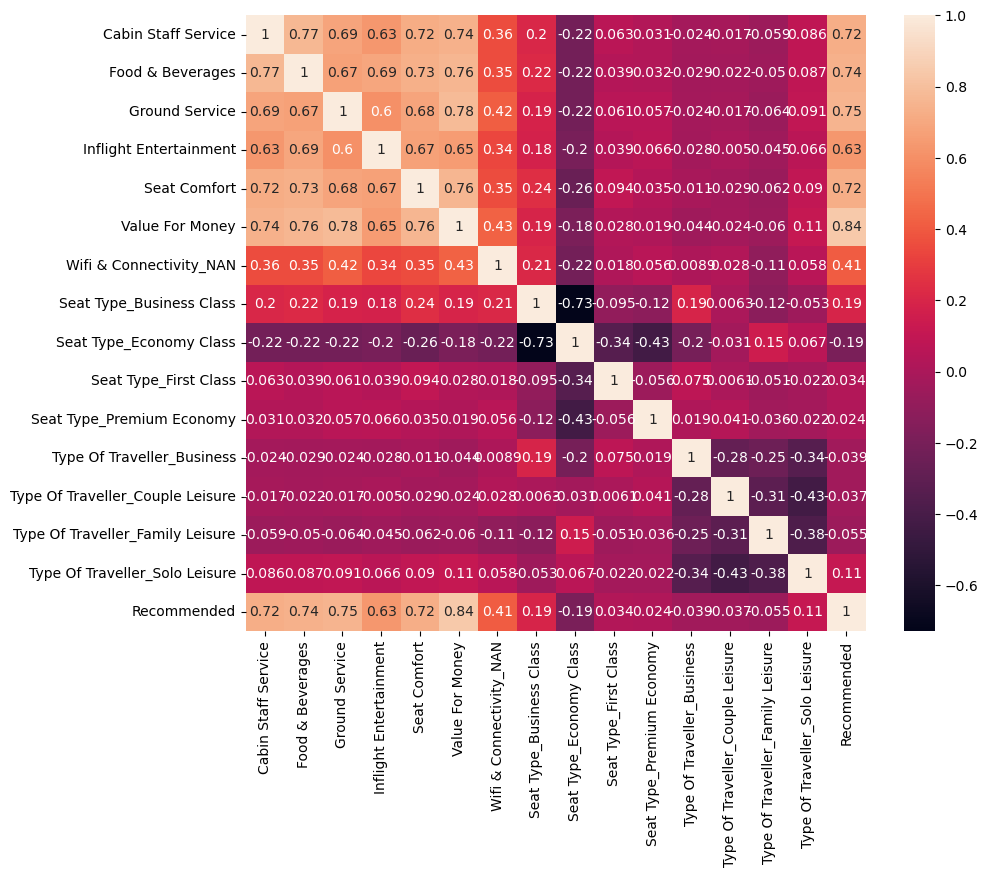

In [59]:
correlation_matrix = rating_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)

high_corr_features = correlation_matrix[abs(correlation_matrix['Recommended']) > 0.5].index
high_corr_features

In [60]:
from sklearn.feature_selection import SelectKBest, f_classif

X = rating_df.drop('Recommended', axis=1)
y = rating_df['Recommended']

k = 15 
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]

feature_scores = [(feature, score) for feature, score in zip(X.columns, selector.scores_)]

sorted_feature_scores = sorted(feature_scores, key=lambda x: x[1], reverse=True)

for feature, score in sorted_feature_scores:
    print(f"{feature}: {score}")


Value For Money: 25611.5780391046
Ground Service: 13862.925878593156
Food & Beverages: 13108.150719729601
Seat Comfort: 11806.653097735978
Cabin Staff Service: 11799.003145849414
Inflight Entertainment: 7060.960098473992
Wifi & Connectivity_NAN: 2170.2838560621194
Seat Type_Business Class: 409.73079518131954
Seat Type_Economy Class: 398.154144607347
Type Of Traveller_Solo Leisure: 138.71332194545167
Type Of Traveller_Family Leisure: 32.180853702569756
Type Of Traveller_Business: 16.196307675253752
Type Of Traveller_Couple Leisure: 14.489191691493833
Seat Type_First Class: 12.137108134334728
Seat Type_Premium Economy: 6.22818599869207


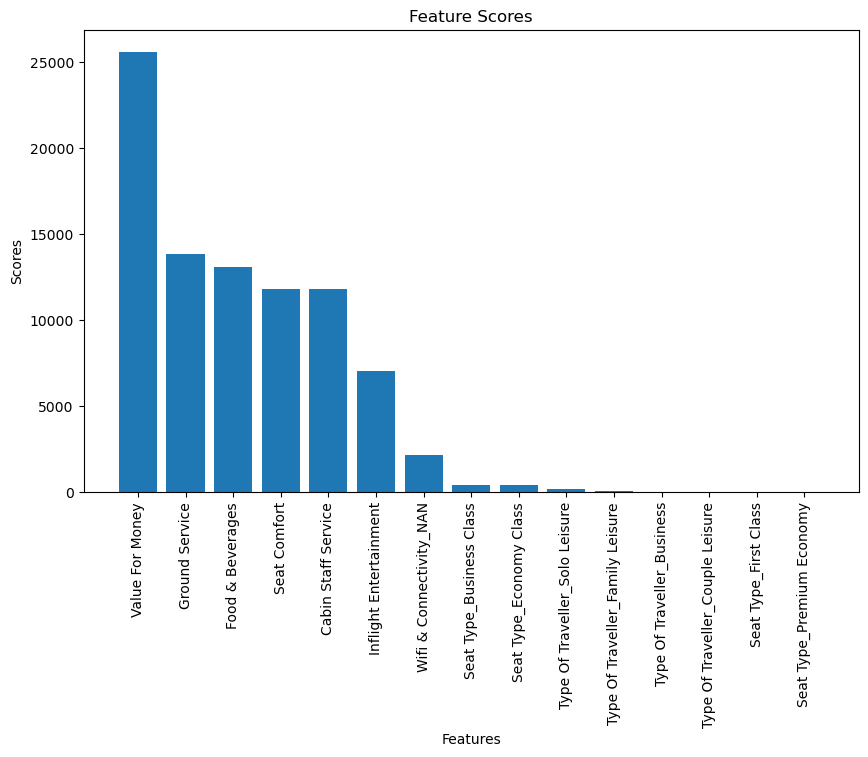

In [61]:
features = [feature for feature, _ in sorted_feature_scores]
scores = [score for _, score in sorted_feature_scores]

plt.figure(figsize=(10, 6))
plt.bar(features, scores)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Scores')
plt.title('Feature Scores')
plt.show()

In [62]:
final_df = rating_df[['Cabin Staff Service', 'Food & Beverages', 'Ground Service', 'Inflight Entertainment',
                'Seat Comfort', 'Value For Money', 'Recommended']]
final_df.head(10)

,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Seat Comfort,Value For Money,Recommended
0,0.00,0.00,0.00,0.00,0.00,0.00,0
1,0.00,0.00,0.00,0.00,0.00,0.00,0
2,0.00,0.00,0.00,0.00,0.00,0.00,0
3,0.25,0.00,0.00,0.00,0.00,0.00,0
4,0.00,0.00,0.00,0.00,0.25,0.00,0
5,1.00,0.75,1.00,0.75,1.00,0.75,1
6,1.00,0.75,1.00,1.00,1.00,0.75,1
7,1.00,0.00,0.75,0.50,0.50,0.00,0
8,0.00,0.25,0.50,0.00,0.00,0.00,0
9,0.00,0.00,0.25,0.25,0.50,0.25,0


In [63]:
final_df.to_csv("final_data_10k.csv")